In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
palette={"Deribit": "#751515", "Lyra": "#157540"}

In [24]:
def preprocess(df):
    df.rename(columns={'lyra_IV': 'Lyra', 'selected_deribit_IV': 'Deribit'}, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by=['date'], inplace=True)
    return df

eth = preprocess(pd.read_csv('../data processing/deribit lyra comparison/eth.csv'))
btc = preprocess(pd.read_csv('../data processing/deribit lyra comparison/btc.csv'))

In [27]:
def print_position_stats(df):
    df['position'] = np.where(df['selected_spot_price'] < df['strike'], 'long', 'short')
    df['position'] = df['position'] + ' ' + df['type']
    print(df['position'].value_counts() / len(df))

# combine eth and btc
print_position_stats(pd.concat([eth, btc]))

position
long call     0.566816
short put     0.253114
long put      0.103635
short call    0.076434
Name: count, dtype: float64


In [14]:
# Function to calculate statistics
def calculate_stats(df):
    stats = {
        'Lyra': {
            'Number of Trades': len(df),
            'Instruments': df['instrument'].nunique(),
            'Min Date': df['date'].min().strftime('%Y-%m-%d'),
            'Max Date': df['date'].max().strftime('%Y-%m-%d'),
            'Min Strike': np.int32(df['strike'].min()),
            'Max Strike': np.int32(df['strike'].max()),
            'IV mean': f"{df['Lyra'].mean():.2f}",
            'IV std': f"{df['Lyra'].std():.2f}",
            'Price mean': f"{df['lyra_price'].mean():.2f}",
            'Price std': f"{df['lyra_price'].std():.2f}",
        },
        'Deribit': {
            'Number of Trades': len(df),
            'Instruments': df['instrument'].nunique(),
            'Min Date': df['date'].min().strftime('%Y-%m-%d'),
            'Max Date': df['date'].max().strftime('%Y-%m-%d'),
            'Min Strike': np.int32(df['strike'].min()),
            'Max Strike': np.int32(df['strike'].max()),
            'IV mean': f"{df['Deribit'].mean():.2f}",
            'IV std': f"{df['Deribit'].std():.2f}",
            'Price mean': f"{df['selected_deribit_price'].mean():.2f}",
            'Price std': f"{df['selected_deribit_price'].std():.2f}",
        }
    }
    return stats

# Calculate stats for Lyra and Deribit
eth_stats = calculate_stats(eth)
btc_stats = calculate_stats(btc)

# Combining both Bitcoin and Ethereum statistics into one DataFrame
stats_data = {
    'Statistic': [
        'N', 'Instruments', 'Min Date', 'Max Date',
        'Min Strike', 'Max Strike', 'IV mean', 'IV std', 'Price mean', 'Price std'
    ],
    'BTC On-Chain': [
        btc_stats['Lyra']['Number of Trades'],
        btc_stats['Lyra']['Instruments'],
        btc_stats['Lyra']['Min Date'],
        btc_stats['Lyra']['Max Date'],
        btc_stats['Lyra']['Min Strike'],
        btc_stats['Lyra']['Max Strike'],
        btc_stats['Lyra']['IV mean'],
        btc_stats['Lyra']['IV std'],
        btc_stats['Lyra']['Price mean'],
        btc_stats['Lyra']['Price std']
    ],
    'BTC Off-Chain': [
        btc_stats['Deribit']['Number of Trades'],
        btc_stats['Deribit']['Instruments'],
        btc_stats['Deribit']['Min Date'],
        btc_stats['Deribit']['Max Date'],
        btc_stats['Deribit']['Min Strike'],
        btc_stats['Deribit']['Max Strike'],
        btc_stats['Deribit']['IV mean'],
        btc_stats['Deribit']['IV std'],
        btc_stats['Deribit']['Price mean'],
        btc_stats['Deribit']['Price std']
    ],
    'ETH On-Chain': [
        eth_stats['Lyra']['Number of Trades'],
        eth_stats['Lyra']['Instruments'],
        eth_stats['Lyra']['Min Date'],
        eth_stats['Lyra']['Max Date'],
        eth_stats['Lyra']['Min Strike'],
        eth_stats['Lyra']['Max Strike'],
        eth_stats['Lyra']['IV mean'],
        eth_stats['Lyra']['IV std'],
        eth_stats['Lyra']['Price mean'],
        eth_stats['Lyra']['Price std']
    ],
    'ETH Off-Chain': [
        eth_stats['Deribit']['Number of Trades'],
        eth_stats['Deribit']['Instruments'],
        eth_stats['Deribit']['Min Date'],
        eth_stats['Deribit']['Max Date'],
        eth_stats['Deribit']['Min Strike'],
        eth_stats['Deribit']['Max Strike'],
        eth_stats['Deribit']['IV mean'],
        eth_stats['Deribit']['IV std'],
        eth_stats['Deribit']['Price mean'],
        eth_stats['Deribit']['Price std']
    ]
}

# Creating the DataFrame
summary_table = pd.DataFrame(stats_data).set_index('Statistic')
latex_output = summary_table.to_latex(index=True, column_format='lcccc', longtable=False, multirow=True)
print(latex_output)

\begin{tabular}{lcccc}
\toprule
 & BTC On-Chain & BTC Off-Chain & ETH On-Chain & ETH Off-Chain \\
Statistic &  &  &  &  \\
\midrule
N & 2297 & 2297 & 21305 & 21305 \\
Instruments & 80 & 80 & 138 & 138 \\
Min Date & 2024-04-26 & 2024-04-26 & 2024-04-26 & 2024-04-26 \\
Max Date & 2024-08-08 & 2024-08-08 & 2024-08-08 & 2024-08-08 \\
Min Strike & 40000 & 40000 & 1500 & 1500 \\
Max Strike & 120000 & 120000 & 10000 & 10000 \\
IV mean & 64.77 & 55.88 & 71.82 & 66.18 \\
IV std & 28.75 & 12.46 & 34.66 & 10.83 \\
Price mean & 3204.60 & 2796.57 & 178.72 & 175.66 \\
Price std & 3273.78 & 2741.17 & 215.93 & 164.59 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1119/2393998968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'] = pd.cut(df['strike'], bins=bins, labels=[f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)])
/tmp/ipykernel_1119/2393998968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'] = pd.cut(df['strike'], bins=bins, labels=[f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)])


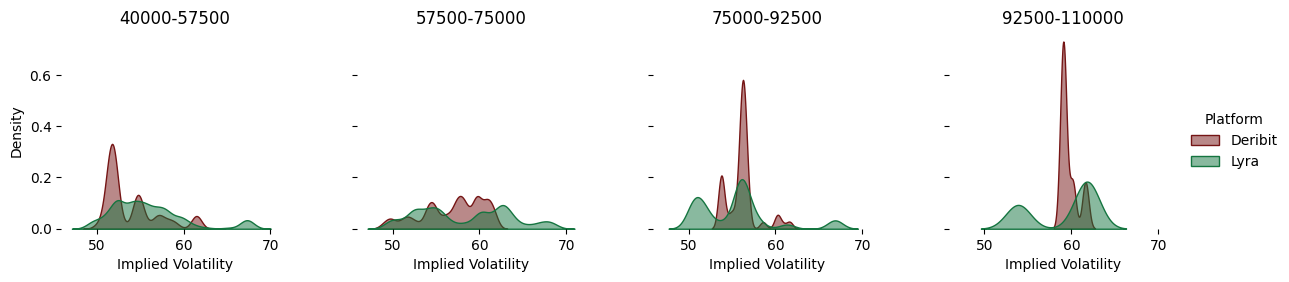

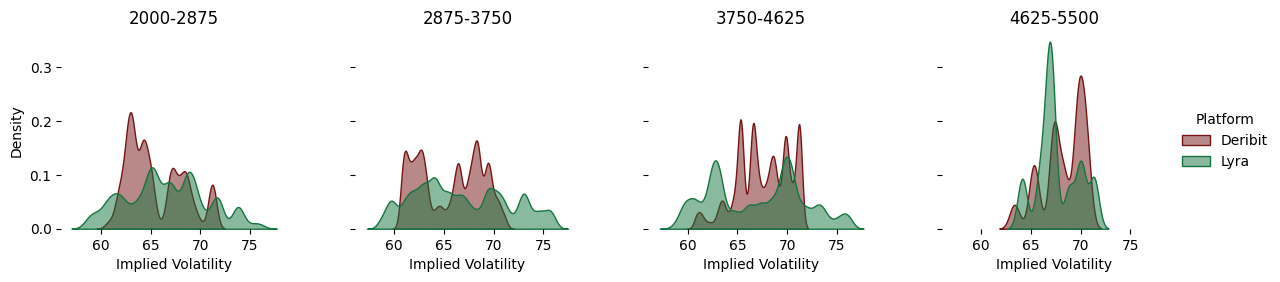

In [15]:
def create_IV_strike_density_plot(df, n, plot_number, asset):
    # Filter rows with 'Lyra' and 'Deribit' within the specified quantile range
    df = df[(df['Lyra'] >= df['Lyra'].quantile(n)) & (df['Lyra'] <= df['Lyra'].quantile(1-n)) & 
            (df['Deribit'] >= df['Deribit'].quantile(n)) & (df['Deribit'] <= df['Deribit'].quantile(1-n))]

    # Calculate unique strike ranges and assign ranges
    unique_strikes = np.sort(df['strike'].unique())
    bins = np.linspace(unique_strikes.min(), unique_strikes.max(), 5)
    df['range'] = pd.cut(df['strike'], bins=bins, labels=[f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)])

    # Create a long format DataFrame for easier plotting
    df_long = pd.melt(df, id_vars=['strike', 'range'], value_vars=['Deribit', 'Lyra'],
                      var_name='IV_type', value_name='IV_value')

    # Create the FacetGrid object
    g = sns.FacetGrid(df_long, col="range", hue="IV_type", aspect=1, height=3, palette=palette)
    g.map(sns.kdeplot, "IV_value", bw_adjust=0.5, fill=True, common_norm=False, alpha=0.5)
    # g.set_titles("{col_name}")
    g.set_xlabels("Implied Volatility")
    g.set_ylabels("Density")
    # make font bigger
    g.set_titles("{col_name}", size=12)


    # g.fig.suptitle(title)
    g.add_legend(title="Platform")
    g.despine(bottom=True, left=True)

    # Adjust the layout and plot title
    plt.subplots_adjust(top=0.85)
    g.fig.subplots_adjust(hspace=0.3, wspace=0.3)
    g.fig.canvas.manager.set_window_title('BTC' if plot_number == 1 else 'ETH')
    plt.savefig(f'IV-strike-{asset}.png')


# Create plots for BTC and ETH
create_IV_strike_density_plot(btc, 0.25, 1, 'BTC')
create_IV_strike_density_plot(eth, 0.25, 2, 'ETH')

In [47]:
expiry_grouped = eth.groupby(['expiry', 'date']).agg({
    'Lyra': 'mean',
    'Deribit': 'mean'
}).reset_index()

unique_expiries = expiry_grouped['expiry'].value_counts()
unique_expiries

expiry
2024-07-26 08:00:00    88
2024-09-27 08:00:00    42
2024-08-30 08:00:00    14
2024-12-27 08:00:00     7
Name: count, dtype: int64

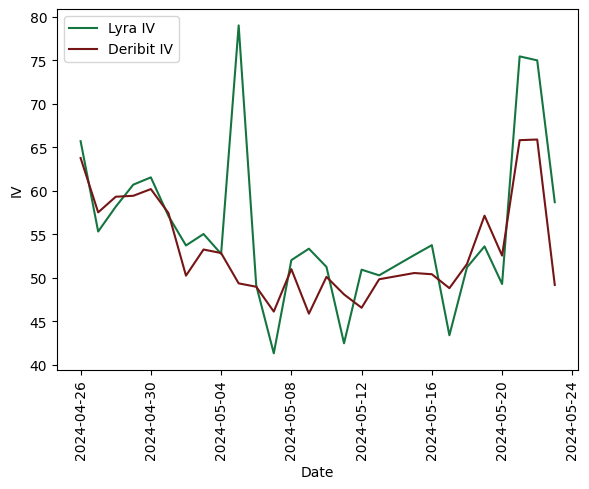

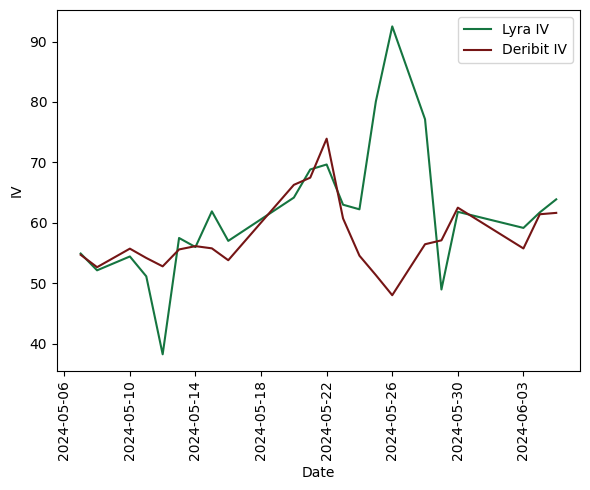

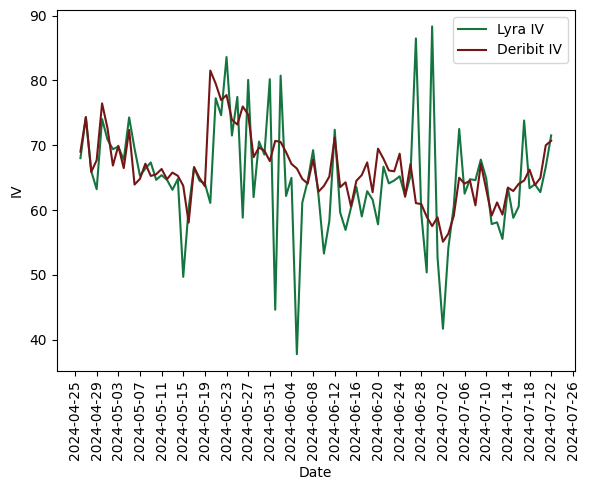

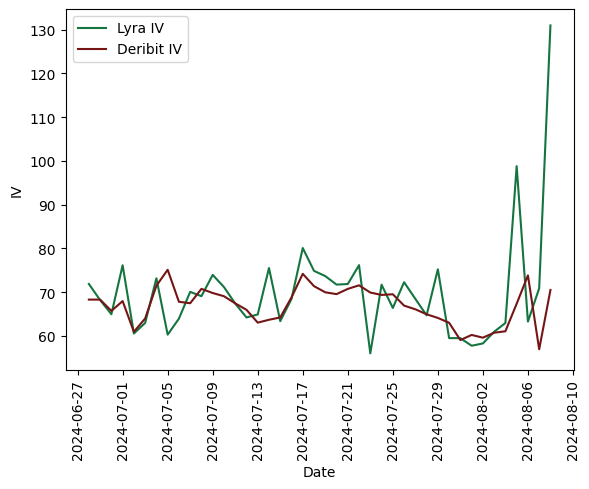

In [52]:
def plot_ivs_over_time(data, asset_name):
    # Group data by 'expiry' and 'date' and calculate the mean of IVs
    expiry_grouped = data.groupby(['expiry', 'date']).agg({
        'Lyra': 'mean',
        'Deribit': 'mean'
    }).reset_index()

    # Filter out expiries with less than 20 data points
    expiry_grouped = expiry_grouped[expiry_grouped['expiry'].map(expiry_grouped['expiry'].value_counts()) > 20]
    unique_expiries = expiry_grouped['expiry'].unique()

    # Create individual plots for each expiry
    for i, expiry in enumerate(unique_expiries):
        fig, ax = plt.subplots(figsize=(6, 5))
        subset = expiry_grouped[expiry_grouped['expiry'] == expiry]
        ax.plot(subset['date'], subset['Lyra'], label='Lyra IV', color=palette['Lyra'])
        ax.plot(subset['date'], subset['Deribit'], label='Deribit IV', color=palette['Deribit'])

        # Set labels
        ax.set_xlabel('Date')
        ax.set_ylabel('IV')

        # Format the date display on x-axis
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.setp(ax.get_xticklabels(), rotation=90)

        ax.legend()
        plt.tight_layout()

        # Save each plot to file
        plt.savefig(f'{asset_name}_expiry_{expiry}.png')
        plt.show()
        plt.close()

# Assuming btc and eth dataframes are defined
plot_ivs_over_time(btc, 'BTC')
plot_ivs_over_time(eth, 'ETH')


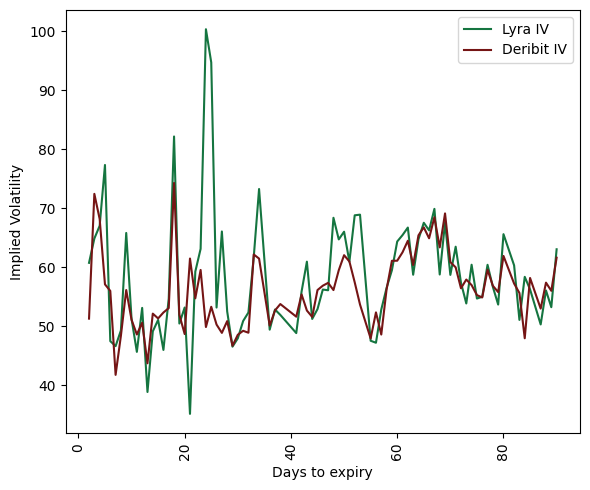

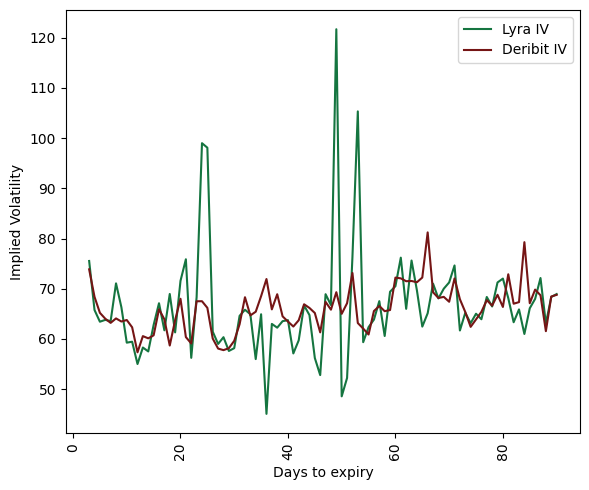

In [7]:
def plot_iv_vs_maturity(data, asset_name):
    # Calculate days to expiry from time to maturity in years
    data['days_to_expiry'] = np.int32(data['time_to_maturity'] * 365)
    
    # Group data by 'days_to_expiry' and calculate the mean of Lyra and Deribit IVs
    data_grouped = data[data['days_to_expiry'] < 100].groupby(['days_to_expiry']).agg({
        'Lyra': 'mean',
        'Deribit': 'mean'
    }).reset_index()

    # Create plot
    plt.figure(figsize=(6, 5))
    plt.plot(data_grouped['days_to_expiry'], data_grouped['Lyra'], label='Lyra', color=palette['Lyra'])
    plt.plot(data_grouped['days_to_expiry'], data_grouped['Deribit'], label='Deribit', color=palette['Deribit'])
    
    plt.xlabel('Days to expiry')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Save plot or display
    plt.savefig(f'{asset_name}_IVs_vs_Maturity.png')
    plt.show()
    plt.close()

# Assuming 'btc' and 'eth' DataFrames are defined and 'time_to_maturity' column exists
plot_iv_vs_maturity(btc, 'BTC')
plot_iv_vs_maturity(eth, 'ETH')
